In [1]:
import matplotlib.pyplot as plt
import numpy as np


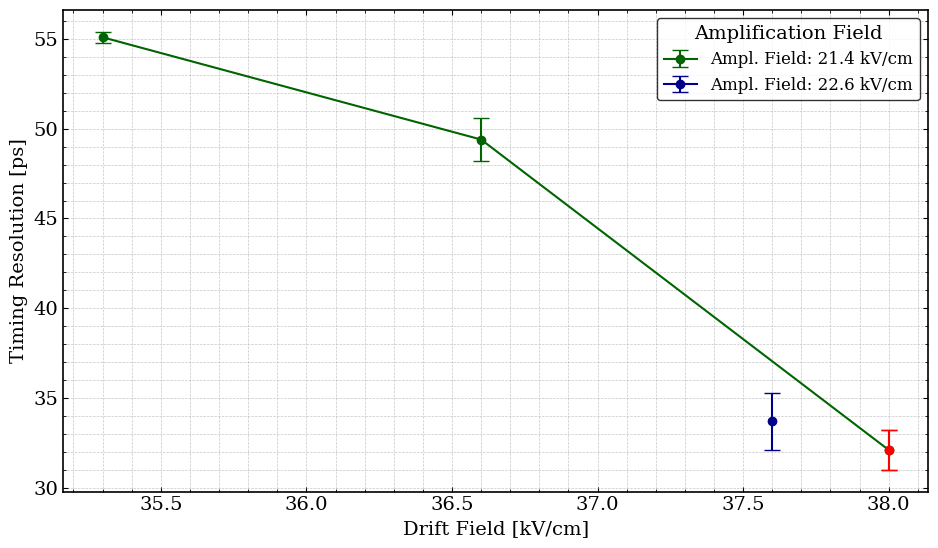

In [2]:
# ROOT-like style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],  # fallback serif
    "font.size": 14,
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "legend.frameon": True,
    "legend.edgecolor": "black"
})

# Raw data
drift_fields = [37.6, 35.3, 36.6, 38.0]
ampl_fields = [22.6, 21.4, 21.4, 21.4]
timing_resolutions = [33.7, 55.1, 49.4, 32.1]
errors = [1.6, 0.3, 1.2, 1.1]

# Organize by amplification field
unique_ampl_fields = sorted(set(ampl_fields))
data_by_ampl = {a: {"x": [], "y": [], "err": []} for a in unique_ampl_fields}

for x, a, y, e in zip(drift_fields, ampl_fields, timing_resolutions, errors):
    data_by_ampl[a]["x"].append(x)
    data_by_ampl[a]["y"].append(y)
    data_by_ampl[a]["err"].append(e)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Color mapping and marker settings
colors = {22.6: 'darkblue', 21.4: 'darkgreen'}
highlight_index = drift_fields.index(max(drift_fields))

for a_field in unique_ampl_fields:
    d = data_by_ampl[a_field]
    for i, (x, y, e) in enumerate(zip(d["x"], d["y"], d["err"])):
        color = 'red' if (x == drift_fields[highlight_index] and y == timing_resolutions[highlight_index]) else colors[a_field]
        ax.errorbar(d["x"], d["y"], yerr=d["err"], fmt='o-', color=colors[a_field], capsize=6,
                    markersize=6, label=f'Ampl. Field: {a_field} kV/cm')
        break  # Only add label once per line to avoid duplicates

# Highlight max drift point in red (on top)
ax.errorbar(drift_fields[highlight_index], timing_resolutions[highlight_index],
            yerr=errors[highlight_index], fmt='o', color='red', capsize=6, markersize=6)

# Labels and styling
ax.set_xlabel("Drift Field [kV/cm]")
ax.set_ylabel("Timing Resolution [ps]")
# ax.set_title("Timing Resolution vs Drift Field")  # Optional

# Full grid and ROOT-like axes
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()

# Hide unnecessary spines
# for spine in ax.spines.values():
#     spine.set_visible(False)

# Legend
ax.legend(title="Amplification Field", fontsize=12, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.96, 0.95])
# plt.show()
plt.savefig("timing_resolution_vs_drift_field_capacitive.pdf", dpi=300)
